In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# The Reduced Wong Wang Model


This model is a reduction of the model presented in [1] to a single population model and used it in a
modelling study of resting state [2, 3]. It is alternatively called dynamic mean-field model. 

The local recurrent connections is the parameter that changes the
stability of the system from monostable to bistable. In the model of
[2] the variable of the local recurrent connections
is denoted by $w$ and its value is 0.9.  However,
[3], used a value of $w=1$ and showed that an
increase of the external input, represented by $I_o$ will result in
three different regimes. Note that in a coupled network, the input to
one node is the addition of both the external input, $I_o$ and the
long-range coupling term.

In [2]:
import numpy
import tvb.simulator.models as models

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'size' : 40}
linewidth = {'linewidth' : 3.0}
mpl.rc('font', **font)
mpl.rc('lines', **linewidth)
linewidth = {'linewidth' : 4.0}
mpl.rc('axes', **linewidth)
import matplotlib.cm as cm

In [4]:
S = numpy.linspace(0., 1., num=1000)

In [5]:
S = S[:, numpy.newaxis]

In [6]:
rww = models.ReducedWongWang()

Have a look at the **default parameters**

In [7]:
rww

ReducedWongWang(I_o=[ 0.33], a=[ 0.27], noise=Noise(ntau, random_stream), d=[ 154.], state_variable_range={'S': array([ 0.,  1.])}, J_N=[ 0.2609], sigma_noise=[  1.00000000e-09], b=[ 0.108], w=[ 0.6], variables_of_interest=['S'], tau_s=[ 100.], gamma=[ 0.641])

Effect of the external input for $w=0.6$
--------------------------------------

In [8]:
Io = numpy.linspace(0.00, 0.42, num=100)

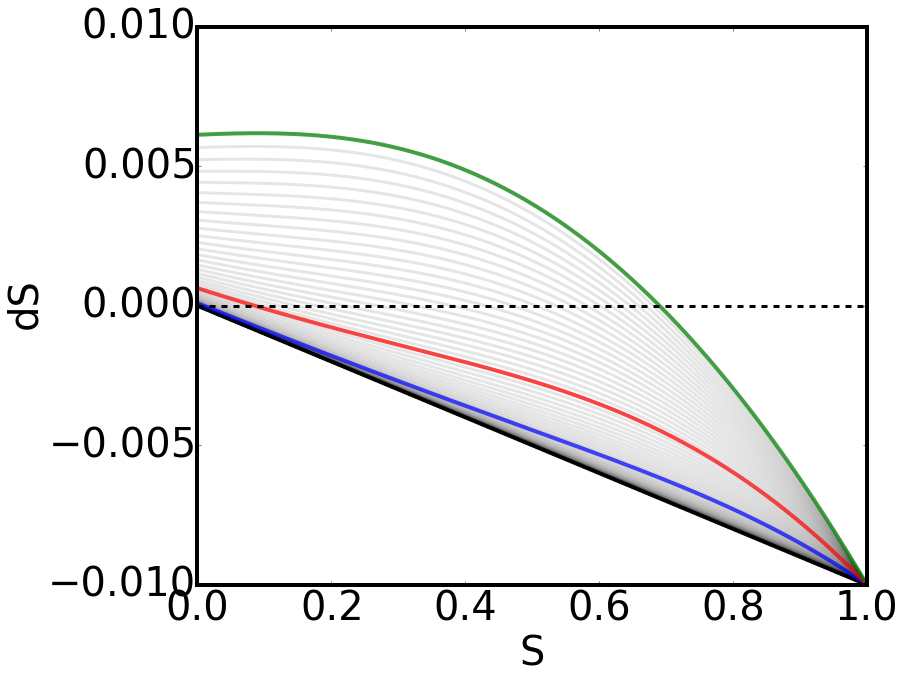

In [9]:
dS = numpy.zeros((100, 1000))
fig = plt.figure(figsize=(12, 10))
for i, io in enumerate(Io):
    rww.I_o = io 
    dS[i, :]= rww.dfun(S[:, numpy.newaxis].T, numpy.array([[0.0]]))
    plt.plot(S, dS[i, :].T, 'k', alpha=0.1)
print S.shape

plt.plot(S, dS[0, :].T, 'k', lw=4, alpha=0.7, label =r"I_o=%0.2f" % Io[0])
plt.plot(S, dS[63, :].T, 'b',lw=4, alpha=0.7, label =r"I_o=%0.2f" % Io[63])
plt.plot(S, dS[77, :].T, 'r',lw=4, alpha=0.7, label =r"I_o=%0.2f" % Io[77])
plt.plot(S, dS[99, :].T, 'g',lw=4, alpha=0.7, label =r"I_o=%0.2f" % Io[99])
plt.plot(S, numpy.zeros(S.shape), 'k--')
plt.ylim([-0.01, 0.01])
plt.xlabel('S')
plt.ylabel('dS')
#plt.legend()

Effect of the external input for $w=1$
--------------------------------------

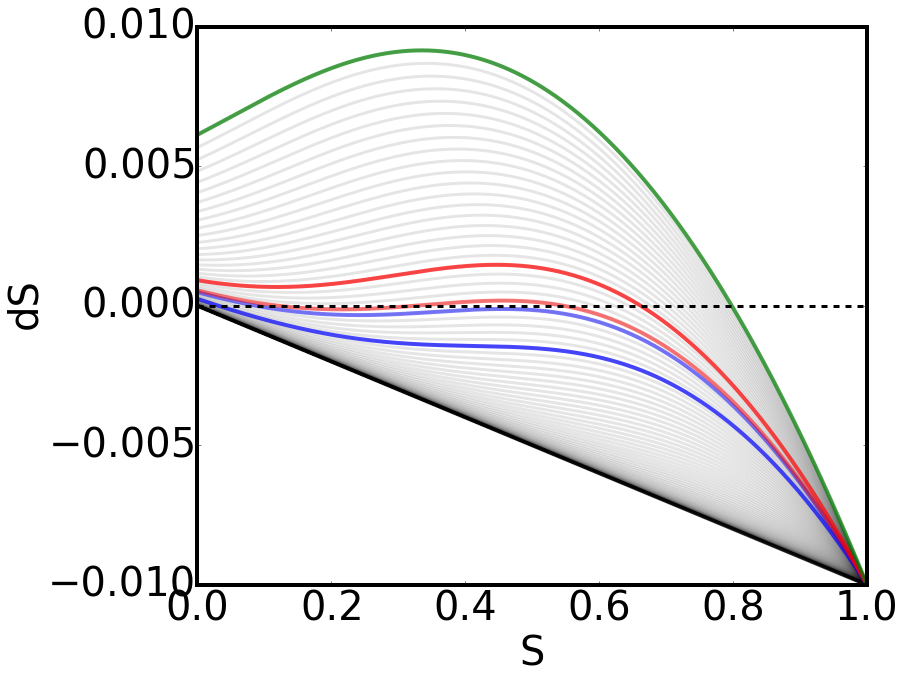

In [10]:
dS = numpy.zeros((100, 1000))
fig = plt.figure(figsize=(12, 10))
rww.w = 1.0
for i, io in enumerate(Io):
    rww.I_o = io 
    dS[i, :]= rww.dfun(S[:, numpy.newaxis].T, numpy.array([[0.0]]))
    plt.plot(S, dS[i, :].T, 'k', alpha=0.1)
print S.shape

plt.plot(S, dS[0, :].T, 'k', lw=4, alpha=0.7, label =r"I_o=%0.4f" % Io[0])
plt.plot(S, dS[70, :].T, 'b',lw=4, alpha=0.7, label =r"I_o=%0.4f" % Io[70])
plt.plot(S, dS[75, :].T, 'b',lw=4, alpha=0.5, label =r"I_o=%0.4f" % Io[75])
plt.plot(S, dS[76, :].T, 'r',lw=4, alpha=0.5, label =r"I_o=%0.4f" % Io[76])
plt.plot(S, dS[80, :].T, 'r',lw=4, alpha=0.7, label =r"I_o=%0.4f" % Io[80])
plt.plot(S, dS[99, :].T, 'g',lw=4, alpha=0.7, label =r"I_o=%0.4f" % Io[99])
plt.plot(S, numpy.zeros(S.shape), 'k--')
plt.ylim([-0.01, 0.01])
plt.xlabel('S')
plt.ylabel('dS')
#plt.legend()

In [11]:
W = numpy.linspace(0.8, 1.05, num=100)

In [12]:
rww.I_o=0.325

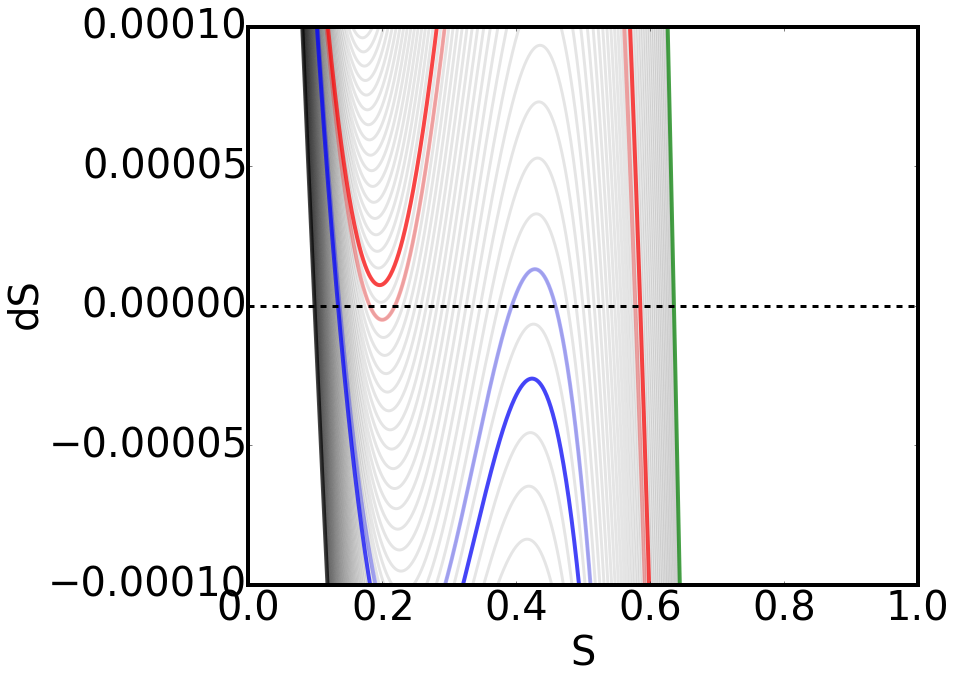

In [13]:
dS = numpy.zeros((100, 1000))
fig = plt.figure(figsize=(12, 10))
rww.w = 1.0
for i, w in enumerate(W):
    rww.w = w 
    dS[i, :]= rww.dfun(S[:, numpy.newaxis].T, numpy.array([[0.0]]))
    plt.plot(S, dS[i, :].T, 'k', alpha=0.1)
print S.shape

plt.plot(S, dS[0, :].T, 'k', lw=4, alpha=0.7, label =r"w=%0.4f" % W[0])
plt.plot(S, dS[60, :].T, 'b',lw=4,  alpha=0.7, label =r"w=%0.4f" % W[60])
plt.plot(S, dS[62, :].T, 'b',lw=4, alpha=0.3, label =r"w=%0.4f" % W[62])
plt.plot(S, dS[79, :].T, 'r',lw=4, alpha=0.3, label =r"w=%0.4f" % W[79])
plt.plot(S, dS[81, :].T, 'r',lw=4, alpha=0.7, label =r"w=%0.4f" % W[81])
plt.plot(S, dS[99, :].T, 'g',lw=4, alpha=0.7, label =r"w=%0.4f" % W[99])
plt.plot(S, numpy.zeros(S.shape), 'k--')
plt.ylim([-0.0001, 0.0001])
plt.xlabel('S')
plt.ylabel('dS')
#plt.legend()

References
----------

[1] Wong, K.-F. & Wang, X.-J. A Recurrent Network Mechanism of Time Integration in Perceptual Decisions J. Neurosci., 2006, 26, 1314-1328

[2] Deco, G.; Ponce-Alvarez, A.; Mantini, D.; Romani, G. L.; Hagmann, P. & Corbetta, M. Resting-state functional connectivity emerges from structurally and dynamically shaped slow linear fluctuations.

[3] Hansen, E et al. Neuroimage, 2014 (in review)